## Load the Dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Jumlah Kematian Balita Berdasarkan Penyebab Kematian di Jawa Barat 2017-2020.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
data.head()


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,penyebab_kematian,jumlah_kematian,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,CAMPAK,0,JIWA,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,DEMAM,0,JIWA,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,DIARE,0,JIWA,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,DIFTERI,0,JIWA,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAIN-LAIN,7,JIWA,2017


## Melakukan Analisis Eksploratif

Langkah ini dilakukan untuk menemukan pola, hubungan, dan outliers. Sebelum melakukan analisis eksploratif, dilakukan pengecekan secara mendasar terlebih dahulu, apakah dataset memiliki nilai yang hilang atau tidak. Pengecekan ini bisa dilakukan dengan statistika deskriptif

In [ ]:
# Basic checks for missing values and descriptive statistics
missing_values = data.isnull().sum()
descriptive_statistics = data.describe()

missing_values, descriptive_statistics

(id                     0
 kode_provinsi          0
 nama_provinsi          0
 kode_kabupaten_kota    0
 nama_kabupaten_kota    0
 penyebab_kematian      0
 jumlah_kematian        0
 satuan                 0
 tahun                  0
 dtype: int64,
                 id  kode_provinsi  kode_kabupaten_kota  jumlah_kematian  \
 count   756.000000          756.0           756.000000       756.000000   
 mean   1133.750000           32.0          3231.333333         1.126984   
 std     531.691443            0.0            31.222508         2.850307   
 min       1.000000           32.0          3201.000000         0.000000   
 25%     698.000000           32.0          3207.000000         0.000000   
 50%    1385.500000           32.0          3214.000000         0.000000   
 75%    1574.250000           32.0          3273.000000         1.000000   
 max    1763.000000           32.0          3279.000000        24.000000   
 
              tahun  
 count   756.000000  
 mean   2018.500000  

Berdasarkan pengecekan awal, dataset tidak memiliki nilai yang hilang dan berikut adalah statistik deskriptif dasar untuk variabel numerik:

1. id: Range dari 1 hingga 1763.
2. kode_provinsi: Semua nilai adalah 32, yang menunjukkan
3. Provinsi Jawa Barat.
4. kode_kabupaten_kota: Variasi kode kabupaten/kota di Jawa Barat.
5. jumlah_kematian: Rata-rata kematian adalah sekitar 1.13 per catatan dengan maksimum 24 kematian dalam satu catatan.
6. tahun: Data mencakup tahun 2017 hingga 2020.

## Analisis Distribusi Jumlah Kematian Balita

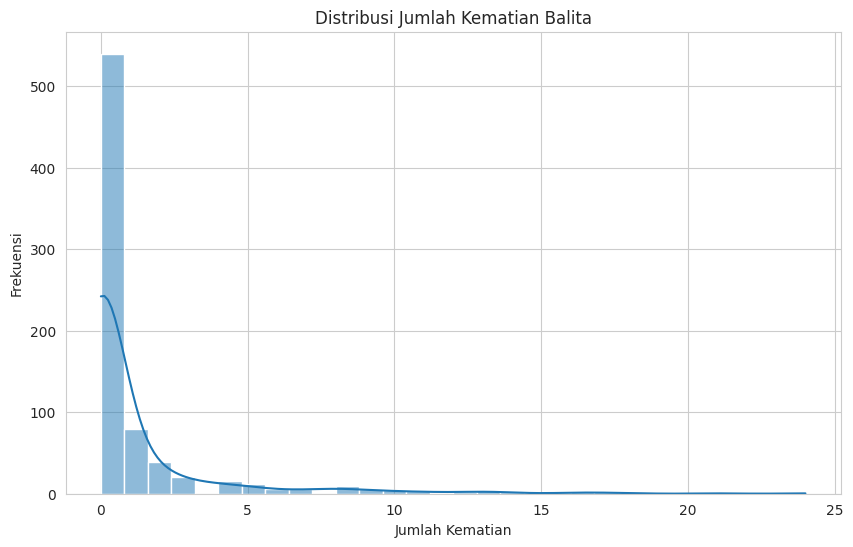

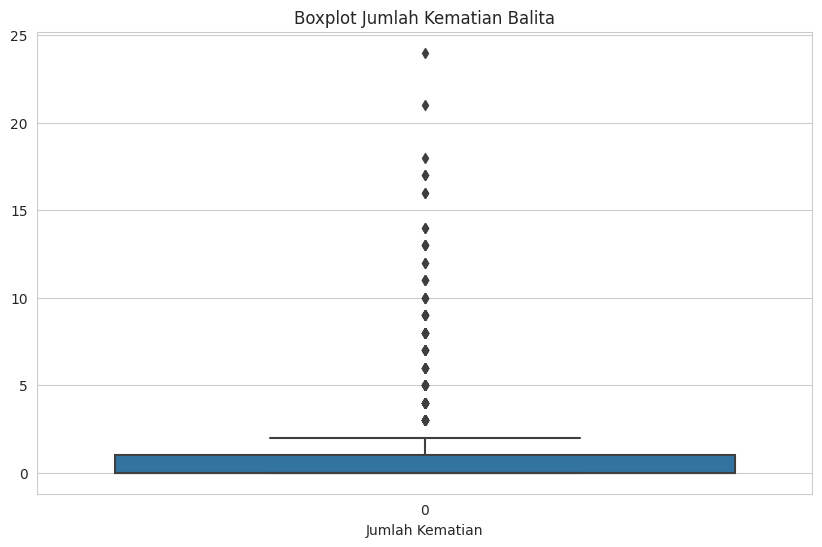

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of 'jumlah_kematian'
plt.figure(figsize=(10, 6))
sns.histplot(data['jumlah_kematian'], kde=True, bins=30)
plt.title('Distribusi Jumlah Kematian Balita')
plt.xlabel('Jumlah Kematian')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['jumlah_kematian'])
plt.title('Boxplot Jumlah Kematian Balita')
plt.xlabel('Jumlah Kematian')
plt.show()


Dari analisis distribusi dan boxplot untuk jumlah kematian balita, kita dapat melihat beberapa hal:

- Distribusi Jumlah Kematian: Sebagian besar data menunjukkan jumlah kematian yang rendah, dengan sejumlah kecil catatan yang memiliki jumlah kematian yang lebih tinggi. Distribusinya sangat miring ke kanan, yang menunjukkan bahwa kasus dengan jumlah kematian tinggi sangat jarang terjadi.

- Outliers: Boxplot mengungkapkan adanya outliers, yaitu nilai yang jauh lebih tinggi dari sebagian besar data. Ini mungkin mencerminkan situasi khusus atau peristiwa yang menyebabkan lonjakan jumlah kematian balita.

## Analisis Tren Kematian berdasarkan Tahun

<ipython-input-5-2616feba9785>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="tahun", y="jumlah_kematian", estimator=sum, ci=None)


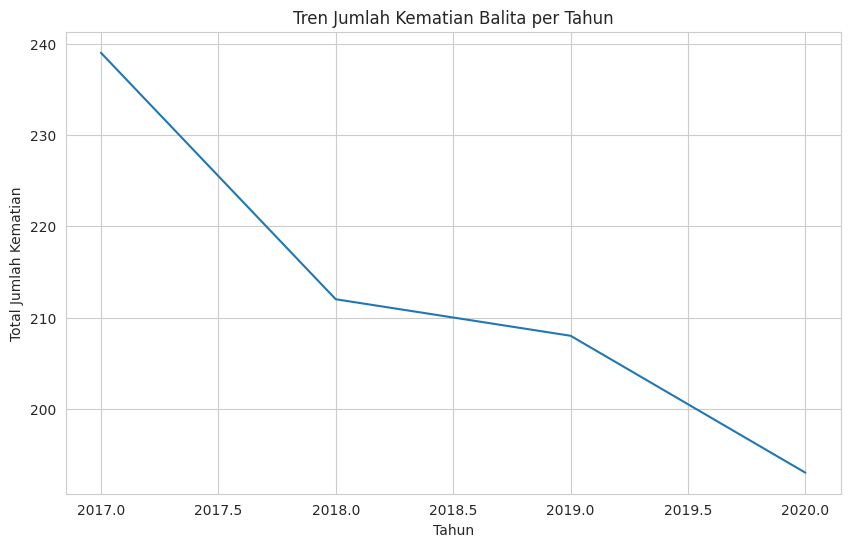

<ipython-input-5-2616feba9785>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['penyebab_kematian', 'tahun']).sum()['jumlah_kematian'].unstack()


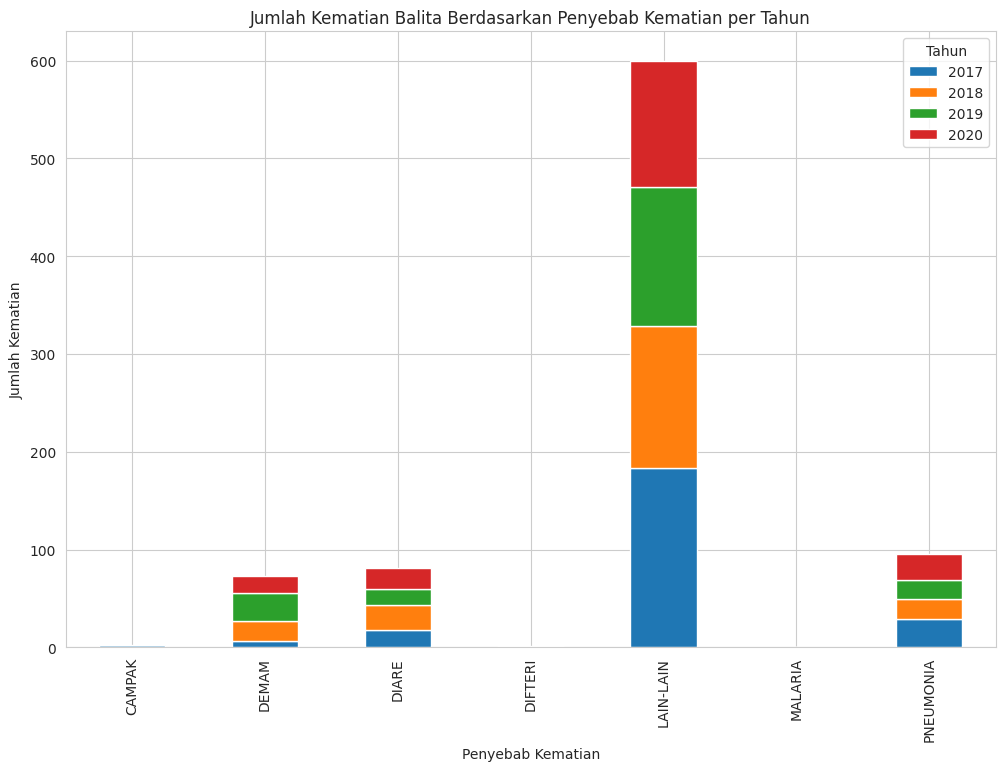

In [ ]:
# Tren jumlah kematian berdasarkan tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="tahun", y="jumlah_kematian", estimator=sum, ci=None)
plt.title('Tren Jumlah Kematian Balita per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Jumlah Kematian')
plt.show()

# Group by penyebab kematian and tahun to see the pattern
grouped_data = data.groupby(['penyebab_kematian', 'tahun']).sum()['jumlah_kematian'].unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Jumlah Kematian Balita Berdasarkan Penyebab Kematian per Tahun')
plt.xlabel('Penyebab Kematian')
plt.ylabel('Jumlah Kematian')
plt.legend(title='Tahun')
plt.show()


Dari analisis tren dan pola kematian balita berdasarkan tahun dan penyebab kematian, kita dapat menyimpulkan sebagai berikut:

Tren Jumlah Kematian per Tahun: Tren tahunan menunjukkan fluktuasi dalam jumlah total kematian balita dari tahun 2017 hingga 2020. Tidak ada tren yang jelas menunjukkan peningkatan atau penurunan yang konsisten sepanjang tahun.

Jumlah Kematian Berdasarkan Penyebab Kematian per Tahun: Grafik batang yang menunjukkan jumlah kematian berdasarkan penyebab kematian dan tahun memberikan gambaran tentang penyebab kematian yang paling dominan selama periode tersebut. Beberapa penyebab kematian tampak lebih menonjol dibandingkan yang lain.

## Analisis Hubungan antara Lokasi (Kabupaten/Kota) dan Jumlah Kematian

<ipython-input-7-36970d0d5ae6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_location = data.groupby(['nama_kabupaten_kota', 'tahun']).sum()['jumlah_kematian'].unstack()


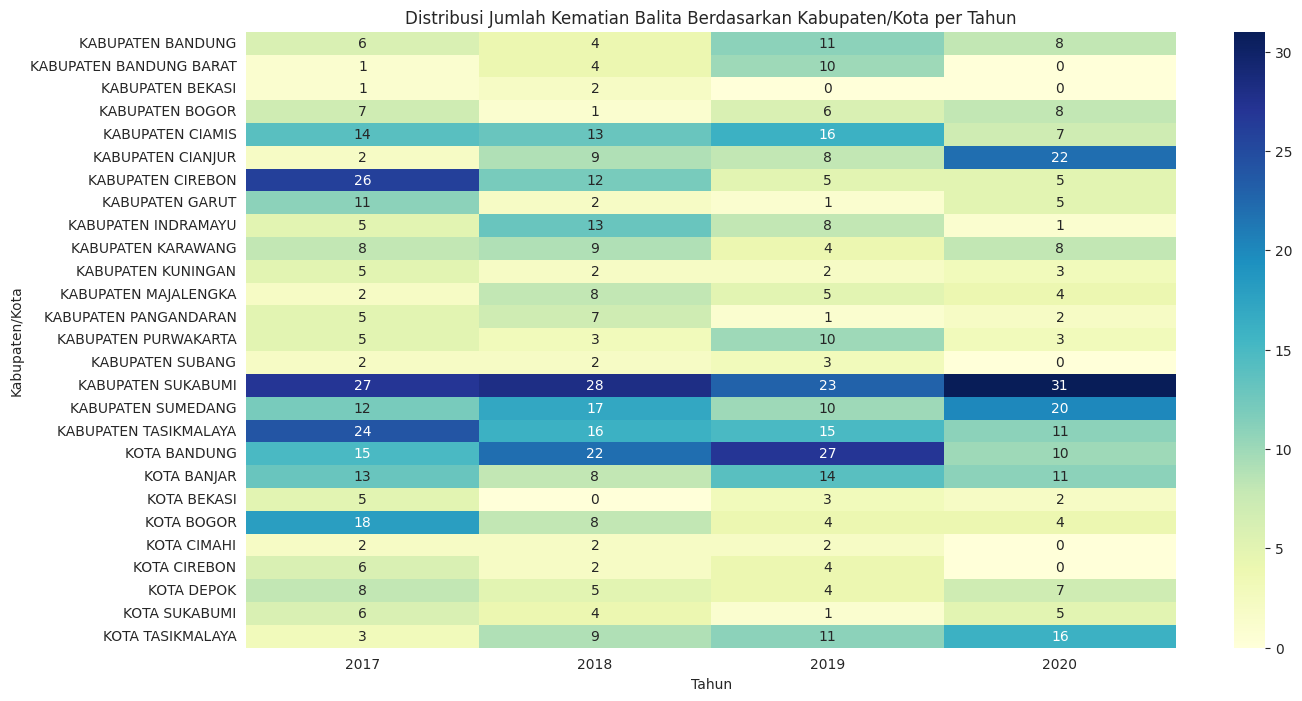

In [ ]:
# Grouping data by kabupaten/kota and tahun
grouped_by_location = data.groupby(['nama_kabupaten_kota', 'tahun']).sum()['jumlah_kematian'].unstack()

# Plotting the distribution of deaths by location
plt.figure(figsize=(15, 8))
sns.heatmap(grouped_by_location, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Distribusi Jumlah Kematian Balita Berdasarkan Kabupaten/Kota per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Kabupaten/Kota')
plt.show()


Dari heatmap menunjukkan distribusi jumlah kematian balita berdasarkan kabupaten/kota di Jawa Barat untuk setiap tahun dari 2017 hingga 2020. Dari heatmap ini, kita dapat melihat:

1. Variasi Geografis: Ada variasi yang jelas dalam jumlah kematian balita antar kabupaten/kota. Beberapa daerah memiliki jumlah kematian yang lebih tinggi dibandingkan dengan daerah lain.

2. Tren Tahunan per Lokasi: Tren tahunan jumlah kematian juga bervariasi antar kabupaten/kota. Beberapa daerah menunjukkan peningkatan atau penurunan jumlah kematian dari tahun ke tahun, sementara yang lainnya cukup konsisten.

### Visualisasi Lainnya

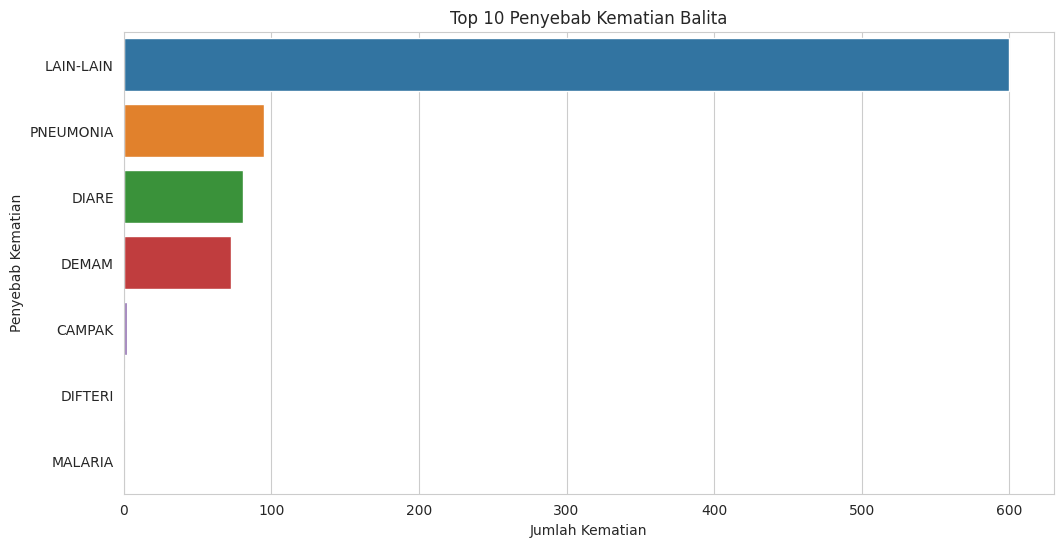

<ipython-input-8-3b17a1a9107b>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


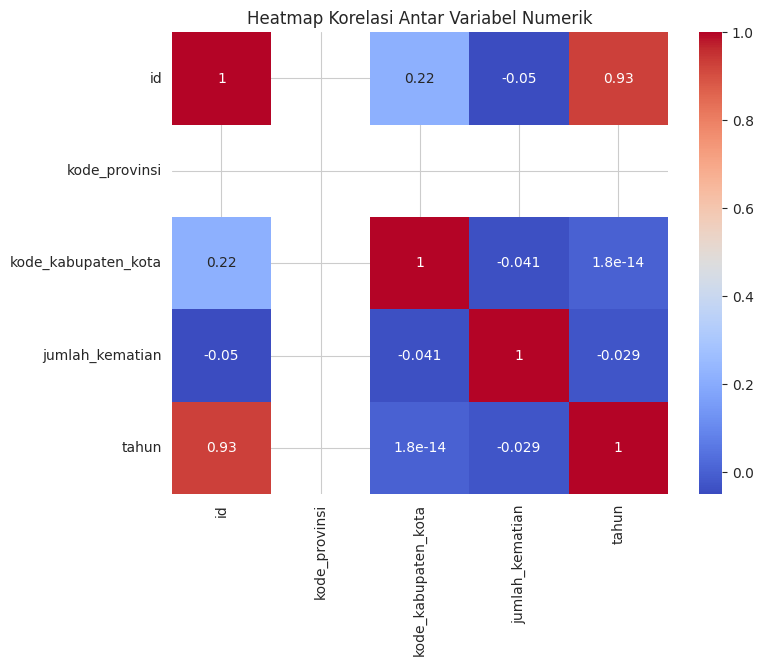

In [ ]:
# Plotting top 10 causes of death
plt.figure(figsize=(12, 6))
top_causes = data.groupby('penyebab_kematian')['jumlah_kematian'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_causes.values, y=top_causes.index)
plt.title('Top 10 Penyebab Kematian Balita')
plt.xlabel('Jumlah Kematian')
plt.ylabel('Penyebab Kematian')
plt.show()

# Checking if there are any numerical correlations
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Top 10 Penyebab Kematian Balita: Grafik ini menyoroti 10 penyebab utama kematian balita di Provinsi Jawa Barat. Penyebab-penyebab ini mungkin memerlukan perhatian lebih dalam strategi kesehatan masyarakat.

Heatmap Korelasi Antar Variabel Numerik: Heatmap ini menunjukkan korelasi antara variabel numerik dalam dataset. Korelasi yang signifikan dapat menunjukkan hubungan yang penting untuk dieksplorasi lebih lanjut dalam analisis regresi.

<ipython-input-5-5b14a1ffa38d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_filtered = data_filtered.corr()


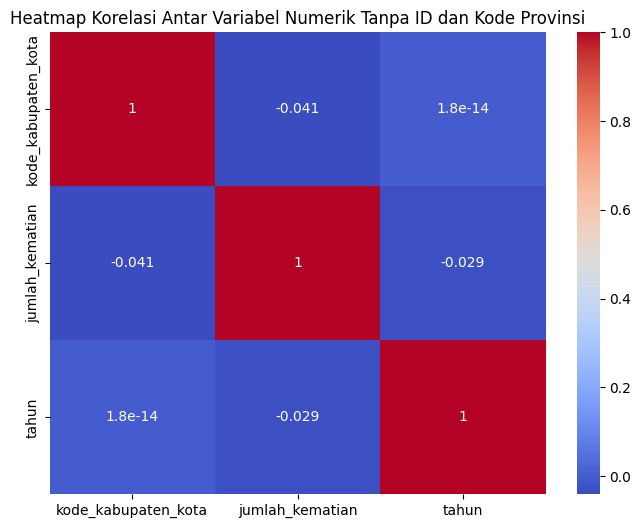

In [ ]:
# Menghapus kolom 'id' dan 'kode_provinsi' dari DataFrame
data_filtered = data.drop(['id', 'kode_provinsi'], axis=1)

# Menghitung matriks korelasi dari data yang telah difilter
correlation_matrix_filtered = data_filtered.corr()

# Membuat heatmap korelasi antar variabel numerik yang tersisa
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel Numerik Tanpa ID dan Kode Provinsi')
plt.show()

## Analisa Linear Regresi

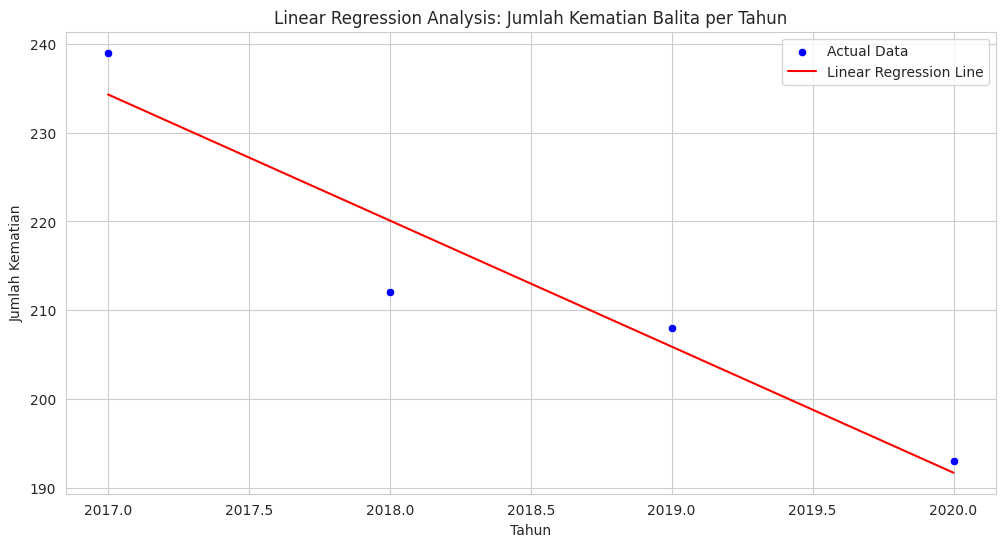

(-14.199999999999996, 28875.69999999999)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparing data for regression analysis
# Grouping data by year and summing the deaths
yearly_data = data.groupby('tahun')['jumlah_kematian'].sum().reset_index()

# Linear Regression
X = yearly_data[['tahun']]  # Independent variable
y = yearly_data['jumlah_kematian']  # Dependent variable

# Creating a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions for the years in the dataset
predictions = model.predict(X)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tahun', y='jumlah_kematian', data=yearly_data, color='blue', label='Actual Data')
plt.plot(yearly_data['tahun'], predictions, color='red', label='Linear Regression Line')
plt.title('Linear Regression Analysis: Jumlah Kematian Balita per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.show()

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

slope, intercept


Analisis regresi linear menunjukkan bahwa ada hubungan antara tahun dan jumlah kematian balita di Provinsi Jawa Barat. Berdasarkan model regresi linear yang dibuat:

- Koefisien Kemiringan (slope) adalah -14.2. Ini menunjukkan bahwa setiap tahunnya, jumlah kematian balita menurun rata-rata 14.2 kasus.
- Nilai intercept (intercept) adalah 28875.7 ini merupakan jumlah kematian balita yang diperkirakan pada titik awal (tahun 0, dalam model ini, yang tidak mewakili tahun yang realistis)

Garis regresi pada grafik menggambarkan tren ini, dengan penurunan jumlah kematian balita seiringnya berjalannya waktu dari tahun 2017 hingga 2020.

## Analisa Regresi Poisson

In [ ]:
import statsmodels.api as sm

# Preparing the data for Poisson regression
# Using 'tahun' as the independent variable and 'jumlah_kematian' as the dependent variable
X = data[['tahun']]
X = sm.add_constant(X)  # adding a constant
y = data['jumlah_kematian']

# Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Display the summary of the model
poisson_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        jumlah_kematian   No. Observations:                  756
Model:                            GLM   Df Residuals:                      754
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1740.2
Date:                Tue, 19 Dec 2023   Deviance:                       2862.2
Time:                        09:41:49   Pearson chi2:                 5.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.006245
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.8532     61.967      2.176      0.030      13.401     256.306
tahun         -0.0668      0.031     -2.174      0.030      -0.127      -0.007
==============================================================================
"""

Model regresi Poisson telah dijalankan dengan menggunakan tahun sebagai variabel independen dan jumlah_kematian sebagai variabel dependen. Berikut adalah hasilnya:

1. Koefisien untuk 'tahun': Koefisien untuk 'tahun' adalah -0.0668. Ini menunjukkan bahwa terdapat penurunan rata-rata eksponensial dalam jumlah kematian seiring bertambahnya tahun. Dengan kata lain, setiap tahun, rata-rata jumlah kematian menurun. Nilai p (P>|z|) untuk tahun adalah 0.030, yang menunjukkan bahwa efek ini secara statistik signifikan.

2. Log-Likelihood dan Deviance: Log-likelihood model adalah -1740.2, dan deviance adalah 2862.2. Ini memberikan informasi tentang kesesuaian model.

Pseudo R-squared: Pseudo R-squared (Comparative Fit Index) adalah 0.006245, menunjukkan bahwa model ini hanya menjelaskan variasi kecil dalam data. Hal ini dapat disebabkan karena kita hanya menggunakan tahun sebagai variabel independen, sementara faktor lain yang mempengaruhi jumlah kematian tidak termasuk dalam model.

## Menerapkan Variabel Tambahan pada model regresi Poisson

 Variabel tambahan, yaitu penyebab_kematian dan kode_kabupaten_kota. Karena kedua variabel ini bersifat kategorikal, kita perlu mengubahnya menjadi variabel dummy sebelum memasukkannya ke dalam model.

In [ ]:
# Creating dummy variables for the categorical variables 'penyebab_kematian' and 'kode_kabupaten_kota'
penyebab_kematian_dummies = pd.get_dummies(data['penyebab_kematian'], drop_first=True)
kode_kabupaten_kota_dummies = pd.get_dummies(data['kode_kabupaten_kota'], drop_first=True)

# Combining the dummy variables with the original dataset
X_extended = pd.concat([X, penyebab_kematian_dummies, kode_kabupaten_kota_dummies], axis=1)

# Poisson regression model with additional variables
poisson_model_extended = sm.GLM(y, X_extended, family=sm.families.Poisson()).fit()

# Display the summary of the extended model
poisson_model_extended.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        jumlah_kematian   No. Observations:                  756
Model:                            GLM   Df Residuals:                      722
Model Family:                 Poisson   Df Model:                           33
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -670.99
Date:                Tue, 19 Dec 2023   Deviance:                       723.68
Time:                        09:45:48   Pearson chi2:                 1.17e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.9413
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.3840     61.971      2.104      0.035       8.923     251.845
tahun         -0.0668      0.031     -2.174      0.030      -0.127      -0.007
DEMAM          3.5973      0.717      5.019      0.000       2.193       5.002
DIARE          3.7013      0.716      5.171      0.000       2.298       5.104
DIFTERI       -0.6931      1.225     -0.566      0.571      -3.094       1.707
LAIN-LAIN      5.7038      0.708      8.053      0.000       4.316       7.092
MALARIA      -20.3940   1.15e+04     -0.002      0.999   -2.26e+04    2.25e+04
PNEUMONIA      3.8607      0.715      5.403      0.000       2.460       5.261
3202           1.6003      0.234      6.847      0.000       1.142       2.058
3203           0.6225      0.264      2.356      0.018       0.105       1.141
3204           0.2763      0.283      0.977      0.329      -0.278       0.830
3205          -0.1466      0.313     -0.468      0.640      -0.760       0.467
3206           1.0986      0.246      4.463      0.000       0.616       1.581
3207           0.8210      0.256      3.209      0.001       0.320       1.322
3208          -0.6061      0.359     -1.689      0.091      -1.310       0.097
3209           0.7802      0.257      3.030      0.002       0.276       1.285
3210          -0.1466      0.313     -0.468      0.640      -0.760       0.467
3211           0.9865      0.250      3.949      0.000       0.497       1.476
3212           0.2048      0.287      0.713      0.476      -0.358       0.768
3213          -1.1451      0.434     -2.639      0.008      -1.996      -0.295
3214          -0.0465      0.305     -0.152      0.879      -0.644       0.551
3215           0.2763      0.283      0.977      0.329      -0.278       0.830
3216          -1.9924      0.615     -3.237      0.001      -3.199      -0.786
3217          -0.3830      0.335     -1.144      0.253      -1.039       0.273
3218          -0.3830      0.335     -1.144      0.253      -1.039       0.273
3271           0.4353      0.274      1.591      0.112      -0.101       0.972
3272          -0.3185      0.329     -0.969      0.332      -0.962       0.326
3273           1.2130      0.243      4.995      0.000       0.737       1.689
3274          -0.6061      0.359     -1.689      0.091      -1.310       0.097
3275          -0.7885      0.381     -2.067      0.039      -1.536      -0.041
3276           0.0870      0.295      0.295      0.768      -0.491       0.666
3277          -1.2993      0.461     -2.821      0.005      -2.202      -0.397
3278           0.5725      0.267      2.147      0.032       0.050       1.095
3279           0.7376      0.259      2.845      0.004       0.230       1.246
==============================================================================
"""

Model regresi Poisson yang diperluas dengan menambahkan variabel penyebab_kematian dan kode_kabupaten_kota telah dijalankan. Berikut adalah ringkasan hasilnya:

1. Koefisien: Koefisien untuk variabel independen memberikan informasi tentang bagaimana masing-masing penyebab kematian dan lokasi (kabupaten/kota) mempengaruhi jumlah kematian balita. Beberapa koefisien memiliki nilai p (P>|z|) yang signifikan, menunjukkan bahwa mereka memiliki pengaruh statistik yang signifikan terhadap jumlah kematian. Misalnya, 'DEMAM', 'DIARE', 'LAIN-LAIN', dan 'PNEUMONIA' memiliki koefisien positif yang signifikan, menunjukkan peningkatan jumlah kematian terkait dengan penyebab-penyebab ini.

2. Log-Likelihood dan Deviance: Log-likelihood model meningkat secara signifikan menjadi -670.99 dibandingkan dengan model sebelumnya, dan deviance adalah 723.68. Ini menunjukkan peningkatan kesesuaian model dengan penambahan variabel tersebut.

Pseudo R-squared: Pseudo R-squared meningkat menjadi 0.9413, menunjukkan bahwa model yang diperluas ini menjelaskan variasi yang jauh lebih besar dalam jumlah kematian dibandingkan dengan model hanya dengan tahun.

## Analisis Klustering

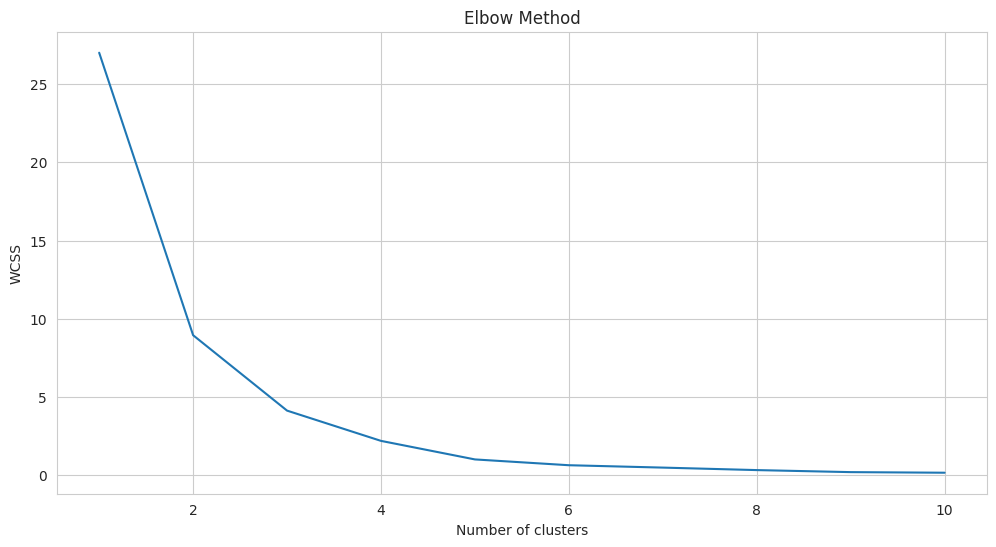

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparing data for clustering
# Summing deaths for each city/kabupaten over the entire period
clustering_data = data.groupby('nama_kabupaten_kota')['jumlah_kematian'].sum().reset_index()

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data[['jumlah_kematian']])

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Dari grafik ini, kita mencari titik di mana kurva mulai melandai, yang menunjukkan jumlah kluster yang optimal. Dalam grafik ini, tampaknya titik tersebut berada di sekitar 3 atau 4 kluster.

Selanjutnya menerapkan analisis klustering dengan jumlah kluster yaitu sebanyak 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


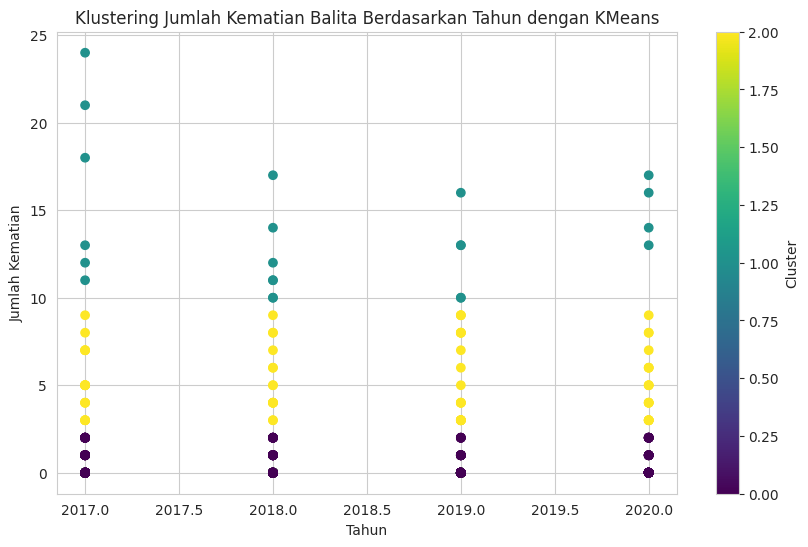

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,penyebab_kematian,jumlah_kematian,satuan,tahun,cluster
324,1199,32,JAWA BARAT,3272,KOTA SUKABUMI,DIARE,1,JIWA,2018,0
430,1438,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,CAMPAK,0,JIWA,2019,0
230,839,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,PNEUMONIA,4,JIWA,2018,2
53,187,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,LAIN-LAIN,3,JIWA,2017,2
264,968,32,JAWA BARAT,3211,KABUPATEN SUMEDANG,MALARIA,0,JIWA,2018,0
12,32,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MALARIA,0,JIWA,2017,0
146,527,32,JAWA BARAT,3273,KOTA BANDUNG,PNEUMONIA,2,JIWA,2017,0
290,1070,32,JAWA BARAT,3215,KABUPATEN KARAWANG,DIFTERI,0,JIWA,2018,0
617,1625,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,DIARE,1,JIWA,2020,0
661,1669,32,JAWA BARAT,3214,KABUPATEN PURWAKARTA,CAMPAK,0,JIWA,2020,0


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the relevant columns for clustering
clustering_data = data[['jumlah_kematian']]

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(clustering_data)

# Adding cluster labels to the original data
data['cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['tahun'], data['jumlah_kematian'], c=data['cluster'], cmap='viridis')
plt.title('Klustering Jumlah Kematian Balita Berdasarkan Tahun dengan KMeans')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.colorbar(label='Cluster')
plt.show()

# Returning a small sample of the data with cluster labels
data.sample(10)


In [ ]:
# Grouping the data by cluster to understand each cluster's characteristics
cluster_summary = data.groupby('cluster')['jumlah_kematian'].agg(['mean', 'min', 'max', 'count'])
cluster_summary


,mean,min,max,count
cluster,,,,
0,0.239757,0,2,659
1,13.909091,10,24,22
2,5.173333,3,9,75


Berikut adalah hasil analisis klustering menggunakan KMeans dengan 3 kluster, berdasarkan jumlah kematian balita:

Dalam plot tersebut, setiap titik mewakili data kematian balita untuk suatu tahun, dan warna menunjukkan kluster yang berbeda. Kluster ini menggambarkan pengelompokan jumlah kematian balita berdasarkan jumlah yang serupa.

Kluster 0:

Rata-rata Jumlah Kematian (Mean): 0.24
Rentang Jumlah Kematian: Dari 0 hingga 2
Jumlah Data (Count): 659
Interpretasi: Kluster ini mencakup wilayah dengan jumlah kematian balita yang sangat rendah. Mayoritas data berada di kluster ini, menunjukkan bahwa sebagian besar wilayah memiliki tingkat kematian balita yang rendah.
Kluster 1:

Rata-rata Jumlah Kematian (Mean): 13.91
Rentang Jumlah Kematian: Dari 10 hingga 24
Jumlah Data (Count): 22
Interpretasi: Kluster ini mencakup wilayah dengan jumlah kematian balita yang tinggi. Meskipun hanya terdapat 22 data dalam kluster ini, angka kematian rata-rata yang jauh lebih tinggi menandakan adanya wilayah dengan masalah kesehatan balita yang serius.
Kluster 2:

Rata-rata Jumlah Kematian (Mean): 5.17
Rentang Jumlah Kematian: Dari 3 hingga 9
Jumlah Data (Count): 75
Interpretasi: Kluster ini mencakup wilayah dengan jumlah kematian balita yang sedang. Jumlah data di kluster ini lebih banyak daripada Kluster 1 tapi jauh lebih sedikit dibandingkan Kluster 0. Ini menunjukkan bahwa sejumlah wilayah memiliki tingkat kematian balita yang lebih tinggi daripada rata-rata tetapi tidak sekritikal wilayah-wilayah dalam Kluster 1.

Kesimpulannya, Kluster 0 mewakili wilayah dengan kondisi kesehatan balita yang relatif baik, Kluster 2 mewakili kondisi menengah, dan Kluster 1 menunjukkan wilayah dengan kondisi kesehatan balita yang paling mengkhawatirkan. Informasi ini membantu mengidentifikasi pola dan tren dalam data kematian balita, yang dapat digunakan untuk merencanakan strategi kesehatan publik dan alokasi sumber daya. ​